In [33]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import seaborn as sns
import time
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.mlab as mlab

In [2]:
hdb_df = pd.read_csv('../datasets/hdb/hdb_resale_2015_2020_cleaned.csv')

In [26]:
hdb_df.remaining_lease.dtypes

dtype('int64')

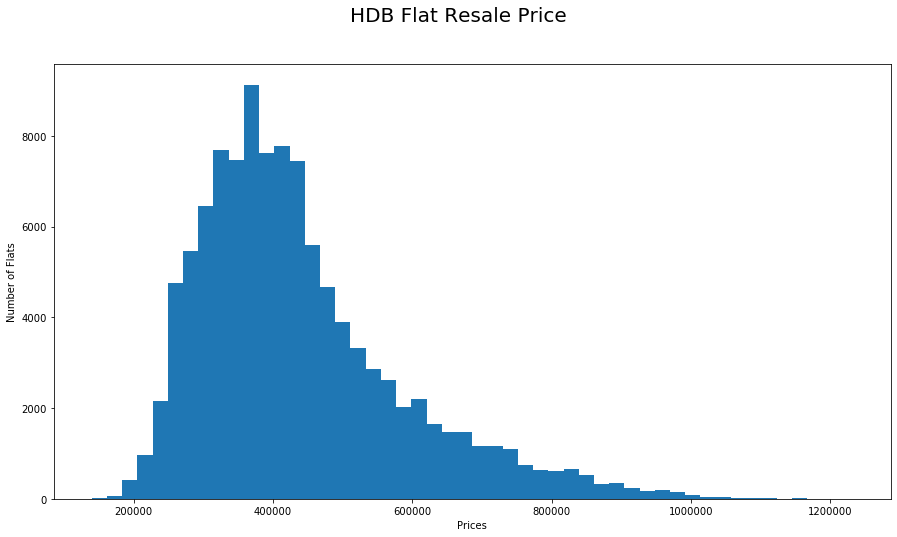

In [40]:
# the histogram of the data

plt.figure(figsize=(15,8))
plt.suptitle('HDB Flat Resale Price', fontsize=20)
plt.hist(hdb_df['resale_price'],bins=50)

plt.xlabel('Prices')
plt.ylabel('Number of Flats')
plt.show()

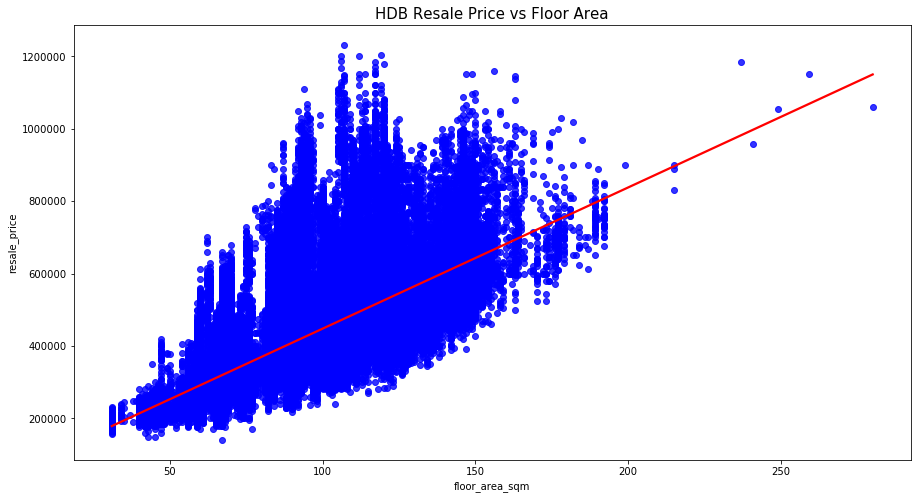

In [50]:
X = hdb_df['floor_area_sqm']
y = hdb_df['resale_price']

plt.figure(figsize=(15,8))
plt.title('HDB Resale Price vs Floor Area', fontsize=15)
sns.regplot(X, y,ci=None, data=hdb_df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

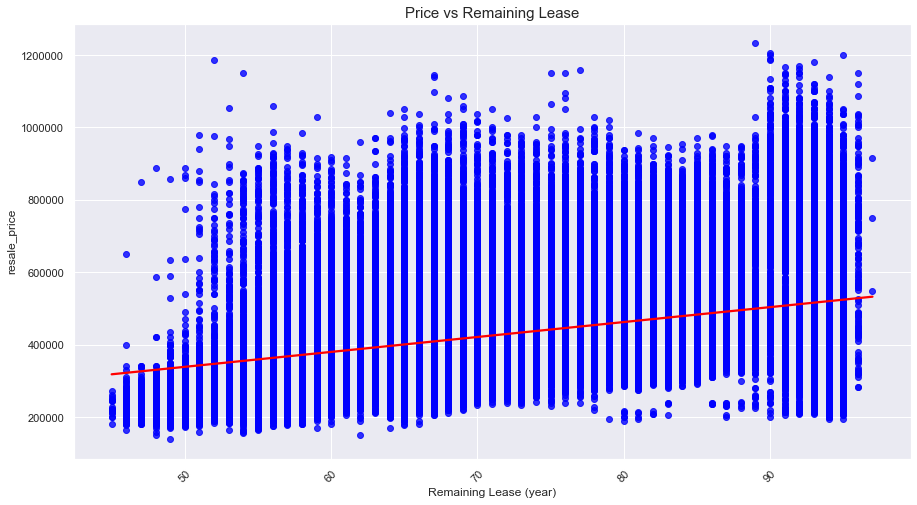

In [89]:
X = hdb_df['remaining_lease']
y = hdb_df['resale_price']

plt.figure(figsize=(15,8))
sns.regplot(X, y,ci=None, data=hdb_df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.xlabel('Remaining Lease (year)')
plt.title(label = 'Price vs Remaining Lease', fontsize=15)
plt.xticks(Rotation='45')
plt.show();

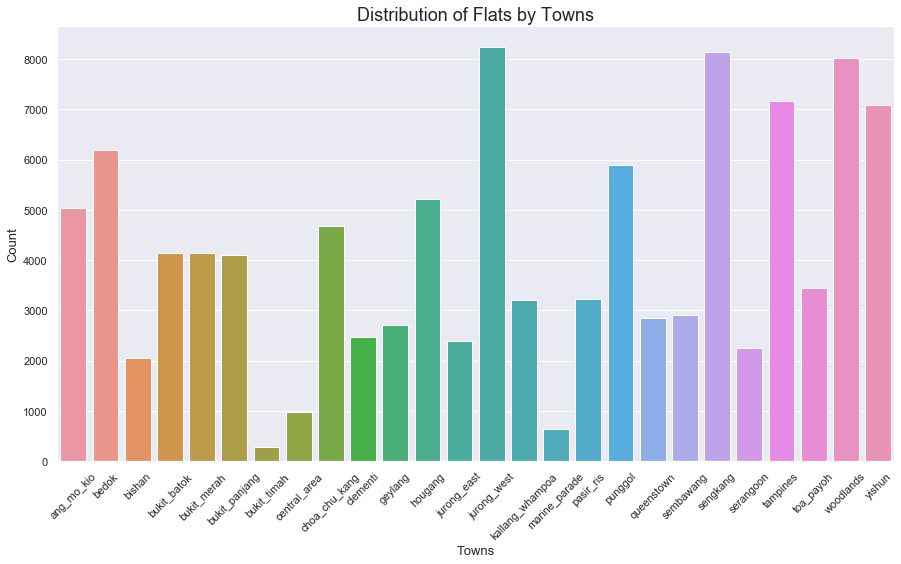

In [86]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
ax = sns.countplot(x="town", data=hdb_df)
plt.xlabel('Towns',fontsize=13)
plt.ylabel('Count',fontsize=13)
plt.title(label = 'Distribution of Flats by Towns', fontsize=18)
plt.xticks(Rotation='45');

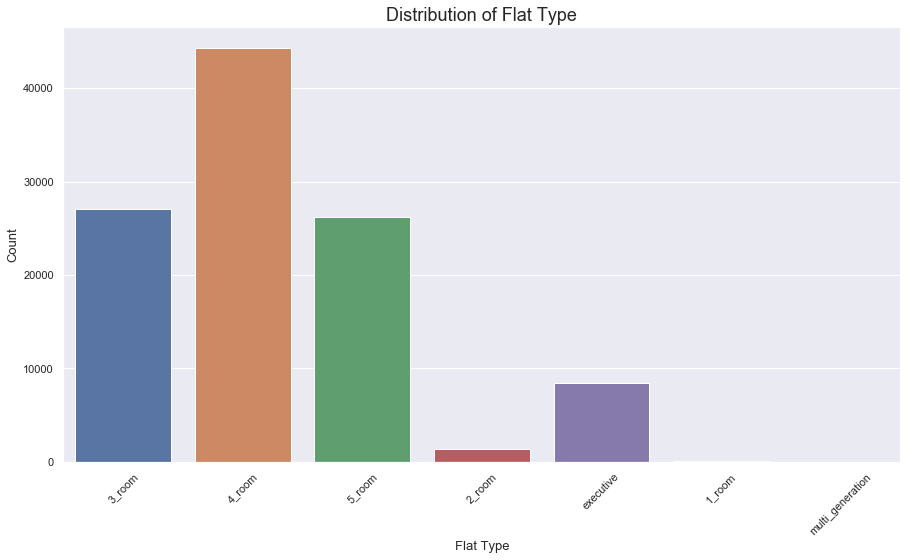

In [83]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
ax = sns.countplot(x="flat_type", data=hdb_df)
plt.xlabel('Flat Types',fontsize=13)
plt.ylabel('Count',fontsize=13)
plt.title(label = 'Distribution of Flats by Types', fontsize=18)
plt.xticks(Rotation='45');

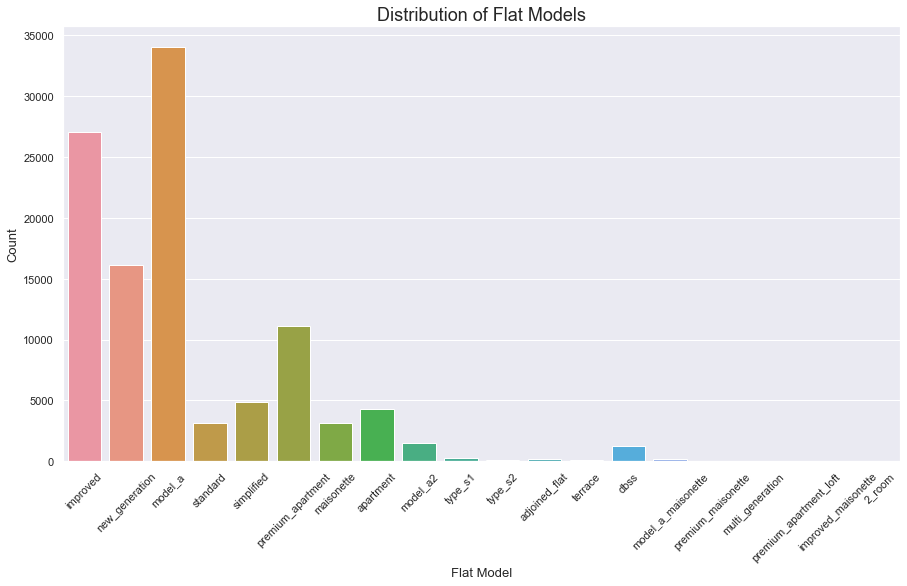

In [85]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
ax = sns.countplot(x="flat_model", data=hdb_df)
plt.xlabel('Flat Models',fontsize=13)
plt.ylabel('Count',fontsize=13)
plt.title(label = 'Distribution of Flats by Models', fontsize=18)
plt.xticks(Rotation='45');

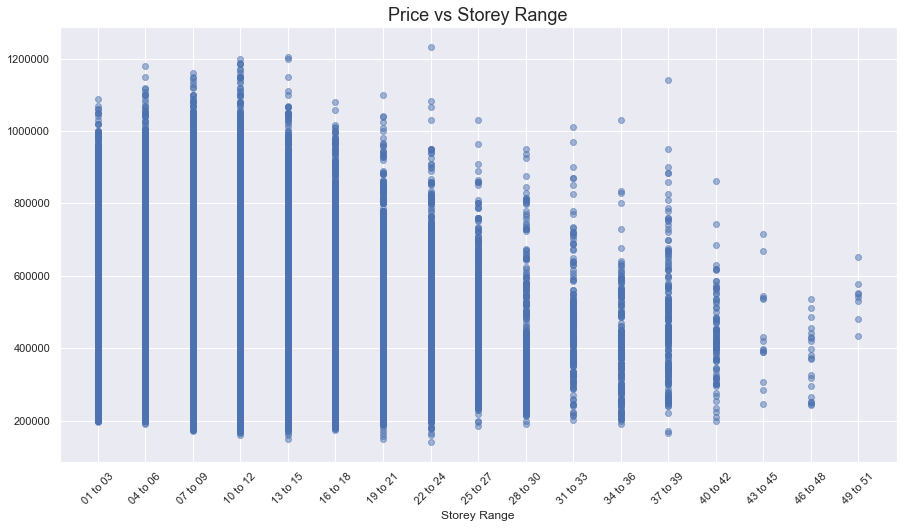

In [88]:
X = hdb_df['storey_range'].sort_values(ascending=True)
y = hdb_df['resale_price']

plt.figure(figsize=(15,8))
plt.scatter(X, y, alpha=0.5)

plt.xlabel('Storey Range')
plt.title(label = 'Price vs Storey Range', fontsize=18)
plt.xticks(Rotation='45')
plt.show();

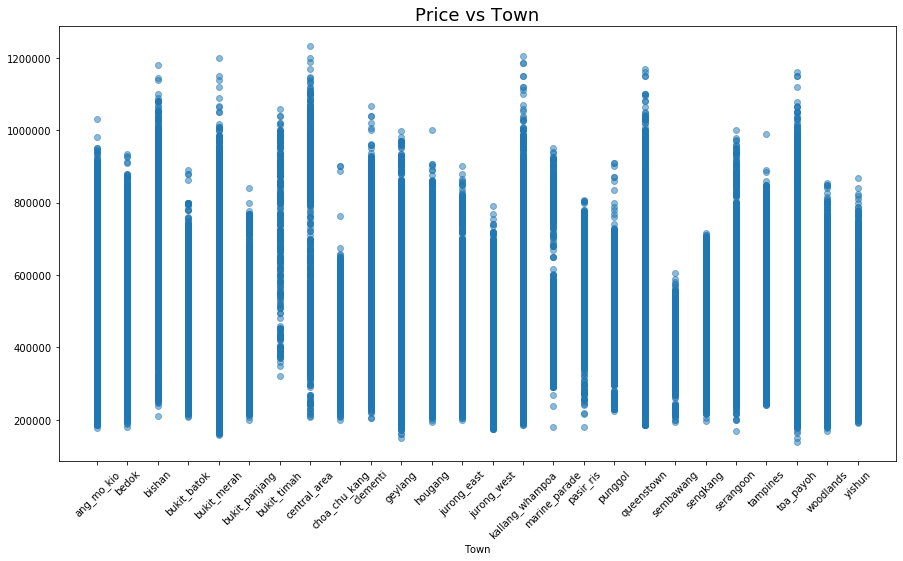

In [54]:
X = hdb_df['town']
y = hdb_df['resale_price']

plt.figure(figsize=(15,8))
plt.scatter(X, y, alpha=0.5)

plt.xlabel('Town')
plt.title(label = 'Price vs Town', fontsize=18)
plt.xticks(Rotation='45')
plt.show();

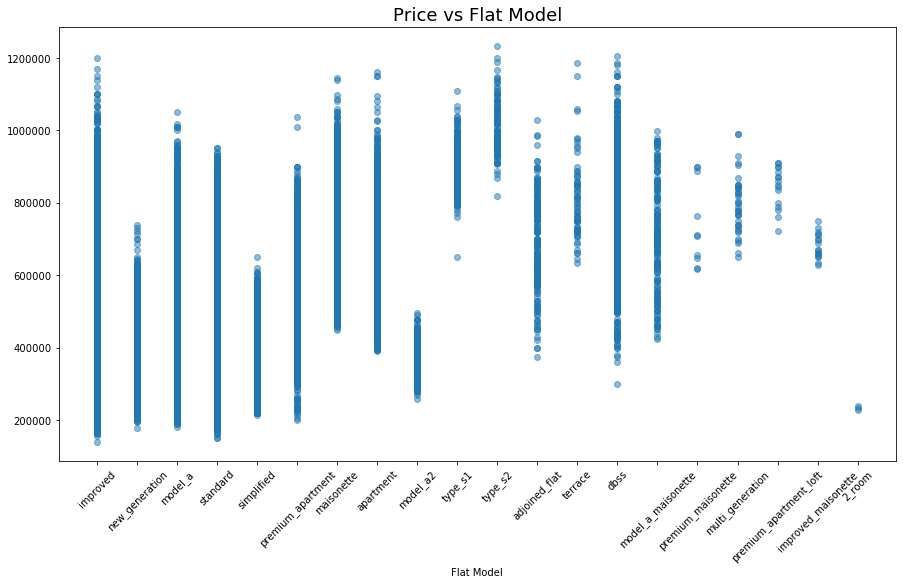

In [16]:
X = hdb_df['flat_model']
y = hdb_df['resale_price']

plt.figure(figsize=(15,8))
plt.scatter(X, y, alpha=0.5)

plt.xlabel('Flat Model')
plt.title(label = 'Price vs Flat Model', fontsize=18)
plt.xticks(Rotation='45')
plt.show();

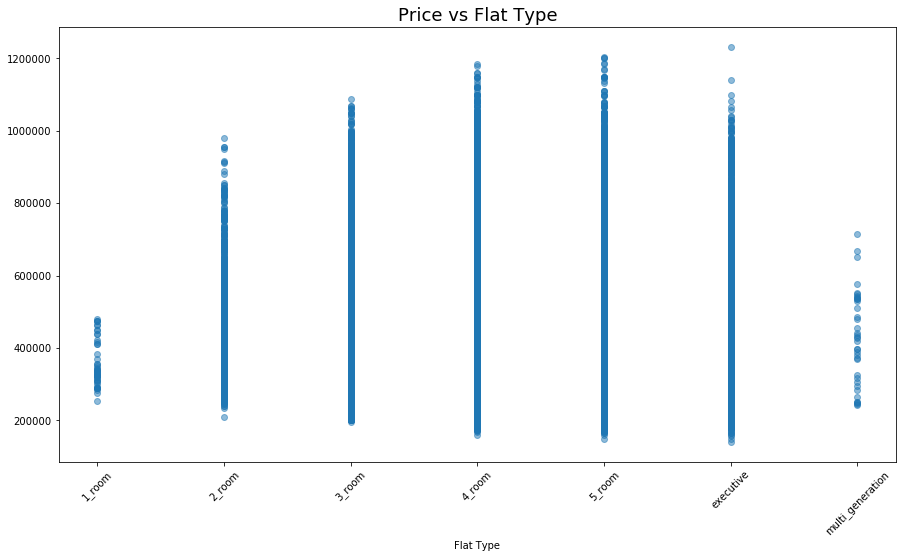

In [24]:
X = hdb_df['flat_type'].sort_values(ascending=True)
y = hdb_df['resale_price']

plt.figure(figsize=(15,8))
plt.scatter(X, y, alpha=0.5)

plt.xlabel('Flat Type')
plt.title(label = 'Price vs Flat Type', fontsize=18)
plt.xticks(Rotation='45')
plt.show();

In [201]:
cli_df = pd.read_csv('../datasets/macro/cli_processed.csv')
pmi_df = pd.read_csv('../datasets/macro/pmi_processed.csv')
gdp_df = pd.read_csv('../datasets/macro/gdp_processed.csv')
unemp_df = pd.read_csv('../datasets/macro/unemployed_processed.csv')
sibor_df = pd.read_csv('../datasets/macro/sibor_processed.csv')
cpf_df = pd.read_csv('../datasets/macro/cpf_processed.csv')
cpi_df = pd.read_csv('../datasets/macro/cpi_processed.csv')
married_df = pd.read_csv('../datasets/macro/married_processed.csv')
hdb_index_df = pd.read_csv('../datasets/macro/hdb_index_processed.csv')
pte_index_df = pd.read_csv('../datasets/macro/pte_index_processed.csv')
pop_df = pd.read_csv('../datasets/macro/pop_processed.csv')
income_df = pd.read_csv('../datasets/macro/income_processed.csv')
bto_df = pd.read_csv('../datasets/macro/bto_flat_processed.csv')
new_pte_df = pd.read_csv('../datasets/macro/new_pte_home_yr.csv')

### Monthly Median Income

In [232]:
income_df.set_index('date',inplace=True)

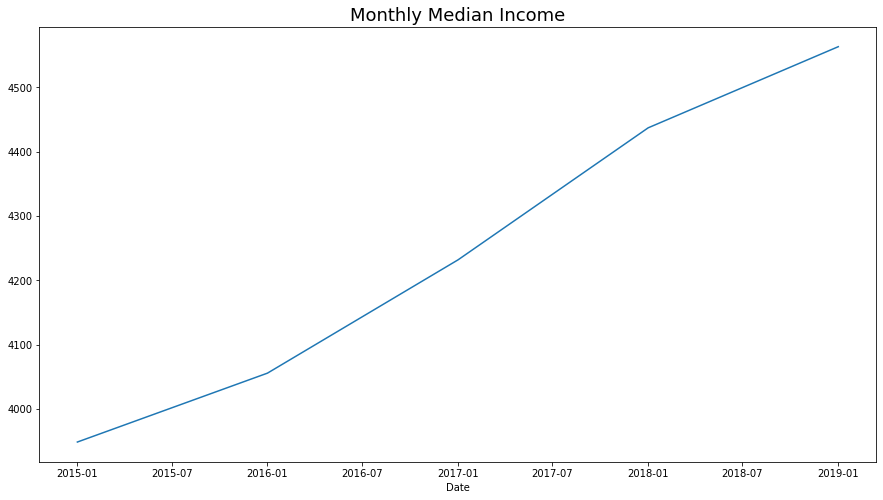

In [235]:
plt.figure(figsize=(15,8))
plt.plot(income_df[income_df['year']>2014]['mth_income'])
plt.xlabel('Date')
plt.title(label = 'Monthly Median Income', fontsize=18)
plt.show();

### Total and Married Residents

In [228]:
married_df.set_index('date',inplace=True)
pop_df.set_index('date',inplace=True)

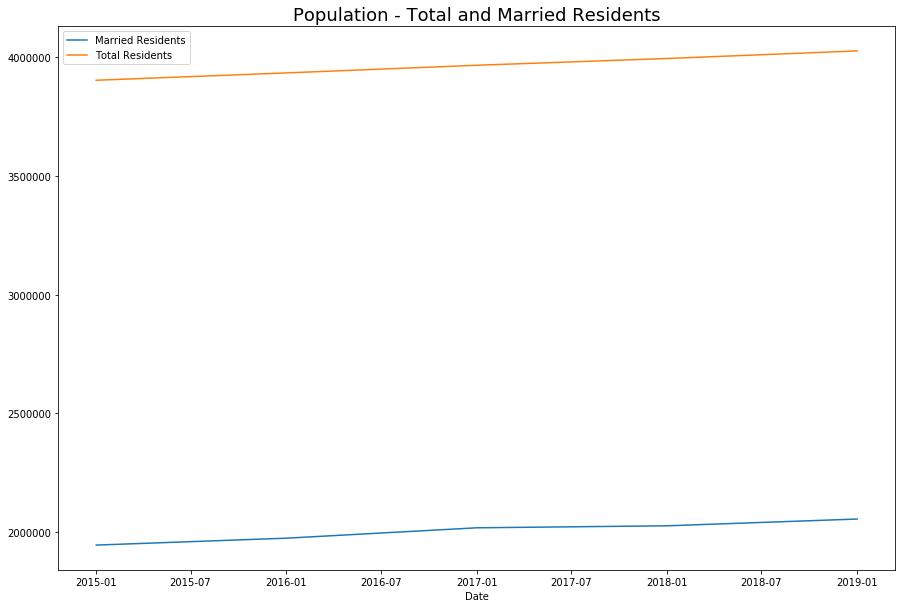

In [230]:
plt.figure(figsize=(15,10))

plt.plot(married_df[married_df['year']>2014]['married'], label="Married Residents")
plt.plot(pop_df[pop_df['year']>2014]['total_residents'], label="Total Residents")

plt.xlabel('Date')
plt.title(label = 'Population - Total and Married Residents', fontsize=18)
plt.legend()
plt.show();

### Home Price Indices

In [222]:
hdb_index_df.set_index('date',inplace=True)
pte_index_df.set_index('date',inplace=True)

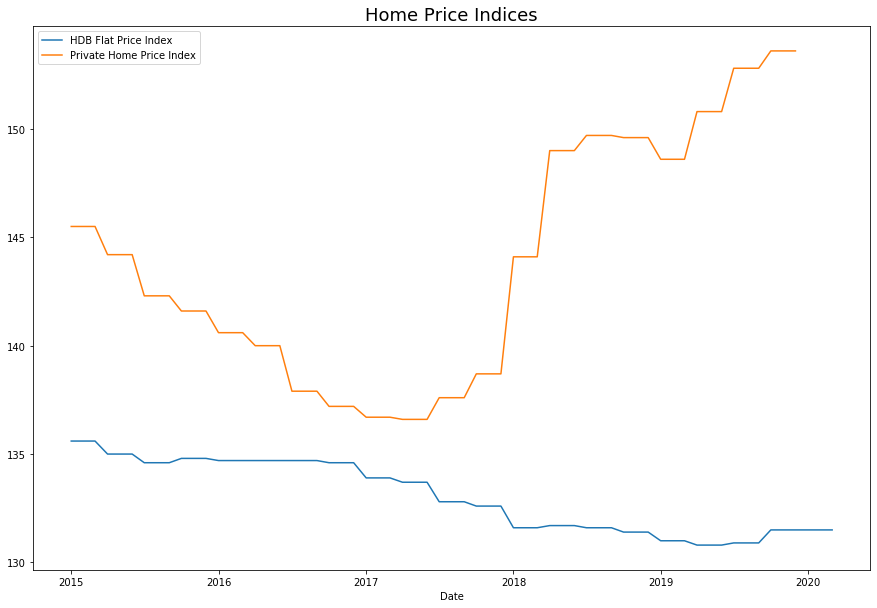

In [225]:
plt.figure(figsize=(15,10))

plt.plot(hdb_index_df[hdb_index_df['year']>2014]['hdb_index'], label="HDB Flat Price Index")
plt.plot(pte_index_df[pte_index_df['year']>2014]['pte_index'], label="Private Home Price Index")

plt.xlabel('Date')
plt.title(label = 'Home Price Indices', fontsize=18)
plt.legend()
plt.show();

### Interest Rates

In [131]:
sibor_df.set_index('date',inplace=True)
cpf_df.set_index('date',inplace=True)

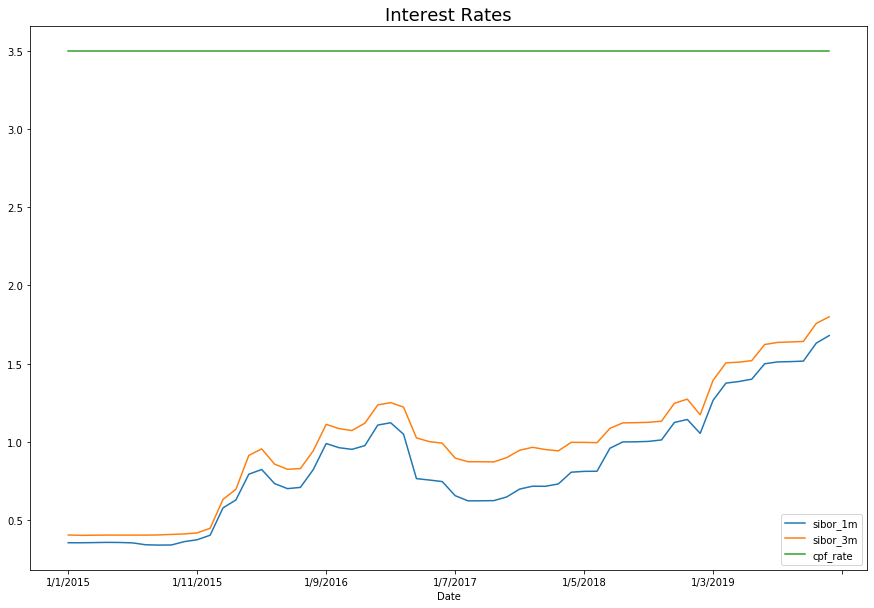

In [132]:
plt.figure(figsize=(15,10))

sibor_df[sibor_df['year']<2019]['sibor_1m'].plot()
sibor_df[sibor_df['year']<2019]['sibor_3m'].plot()
cpf_df[cpf_df['year']>2014]['cpf_rate'].plot()

#plt.xlim(datetime.date(2015,1,1),datetime.date(2019,12,1))
plt.xlabel('Date')
plt.title(label = 'Interest Rates', fontsize=18)
plt.legend()
plt.show();

### New Home Launches

In [ ]:
bto_df.set_index('year',inplace=True)
new_pte_df.set_index('year',inplace=True)

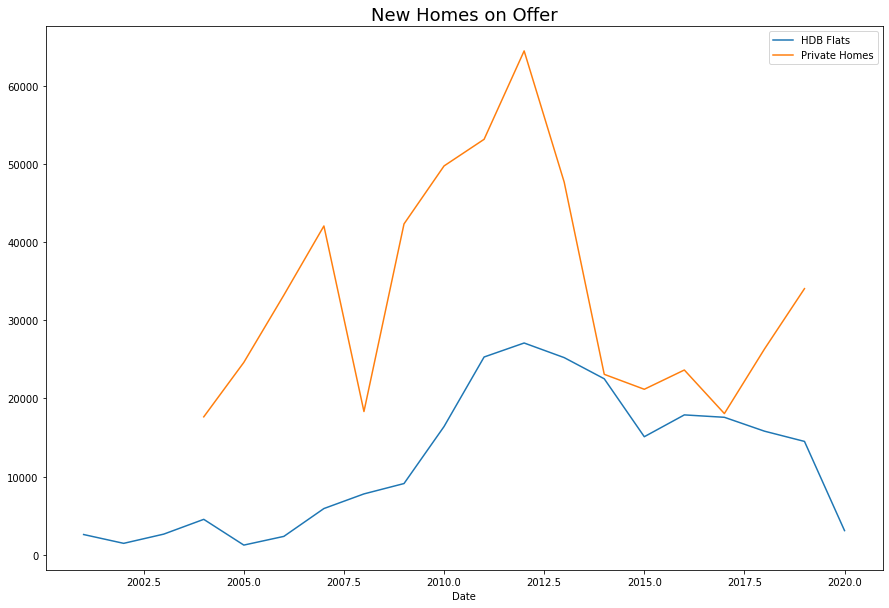

In [133]:
plt.figure(figsize=(15,10))

plt.plot(bto_df['new_flat_offered'], label="HDB Flats")
plt.plot(new_pte_df['new_pte_home_offered'], label="Private Homes")

#plt.ylabel('')
plt.xlabel('Date')
plt.title(label = 'New Homes on Offer', fontsize=18)
plt.legend()
plt.show();

### Key Economic Indicators

In [226]:
cpi_df.set_index('date',inplace=True)
cli_df.set_index('date',inplace=True)
pmi_df.set_index('date',inplace=True)
gdp_df.set_index('date',inplace=True)
unemp_df.set_index('date',inplace=True)

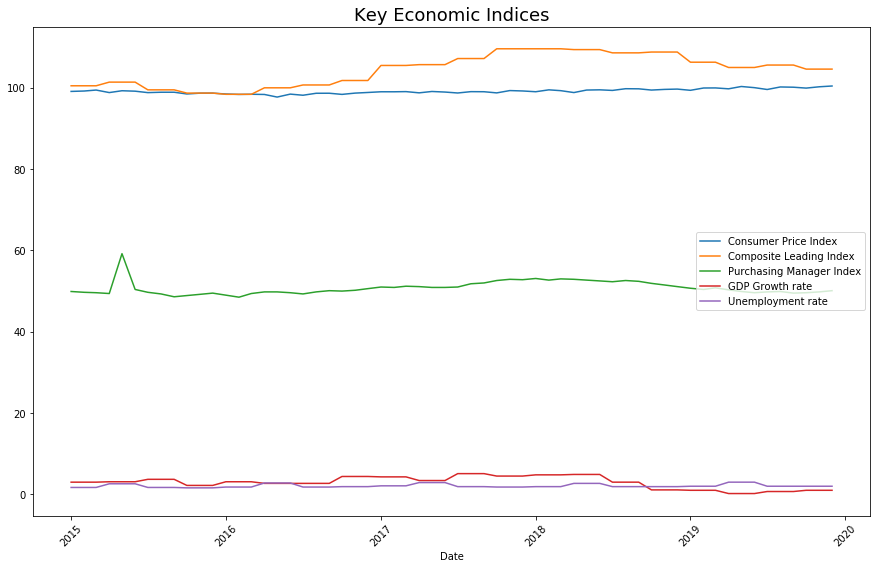

In [227]:
plt.figure(figsize=(15,9))
plt.plot(cpi_df[(cpi_df['year']>2014) & (cpi_df['year']<2020)]['cpi'], label="Consumer Price Index")
plt.plot(cli_df[(cli_df['year']>2014) & (cli_df['year']<2020)]['cli'], label="Composite Leading Index")
plt.plot(pmi_df[(pmi_df['year']>2014) & (pmi_df['year']<2020)]['pmi'], label="Purchasing Manager Index")
plt.plot(gdp_df[(gdp_df['year']>2014) & (gdp_df['year']<2020)]['gdp_growth'], label="GDP Growth rate")
plt.plot(unemp_df[(unemp_df['year']>2014) & (unemp_df['year']<2020)]['unemployed_rate'], label="Unemployment rate")

plt.xticks(Rotation='45')

#plt.ylabel('')
plt.xlabel('Date')
plt.title(label = 'Key Economic Indices', fontsize=18)
plt.legend()
plt.show();

## Points of Interest

In [19]:
hdb_df = pd.read_csv('../datasets/final/hdb_2015_2018.csv')

In [20]:
hdb_df.columns

Index(['month', 'storey_range', 'floor_area_sqm', 'lease_commence_date',
       'remaining_lease', 'resale_price', 'address', 'year', 'bedok', 'bishan',
       'bukit_batok', 'bukit_merah', 'bukit_panjang', 'bukit_timah',
       'central_area', 'choa_chu_kang', 'clementi', 'geylang', 'hougang',
       'jurong_east', 'jurong_west', 'kallang_whampoa', 'marine_parade',
       'pasir_ris', 'punggol', 'queenstown', 'sembawang', 'sengkang',
       'serangoon', 'tampines', 'toa_payoh', 'woodlands', 'yishun',
       'model_adjoined_flat', 'model_apartment', 'model_dbss',
       'model_improved', 'model_improved_maisonette', 'model_maisonette',
       'model_model_a', 'model_model_a2', 'model_model_a_maisonette',
       'model_multi_generation', 'model_new_generation',
       'model_premium_apartment', 'model_premium_apartment_loft',
       'model_premium_maisonette', 'model_simplified', 'model_standard',
       'model_terrace', 'model_type_s1', 'model_type_s2', 'type_2_room',
       'type_3_ro

In [25]:
hdb_df.columns[76]

'dist_mrt'

In [26]:
hdb_df.iloc[:,76:].describe()

,dist_mrt,dist_mall,dist_hawker,dist_park,dist_after_death,dist_attraction,dist_pool,dist_gym,dist_tennis,dist_stadium,dist_sports_hall,dist_library
count,8.040500e+04,8.040500e+04,80405.000000,8.040500e+04,8.040500e+04,8.040500e+04,8.040500e+04,8.040500e+04,8.040500e+04,8.040500e+04,8.040500e+04,8.040500e+04
mean,1.543181e+04,1.556715e+04,1153.316828,1.556909e+04,1.939036e+04,1.743459e+04,1.615173e+04,1.637717e+04,1.819368e+04,1.665706e+04,1.638795e+04,1.596172e+04
std,4.121567e+05,4.123178e+05,1816.462424,4.123750e+05,4.122225e+05,4.122466e+05,4.123578e+05,4.123500e+05,4.122894e+05,4.123405e+05,4.123497e+05,4.124073e+05
min,2.009000e+01,1.113000e+01,0.000000,3.311000e+01,6.104000e+01,1.507000e+01,1.226000e+01,1.226000e+01,3.022000e+01,3.022000e+01,1.226000e+01,2.037000e+01
25%,3.352000e+02,4.511600e+02,359.750000,4.812400e+02,2.196710e+03,1.473330e+03,8.153400e+02,9.404300e+02,1.608110e+03,1.000470e+03,9.502500e+02,7.358400e+02
50%,5.746200e+02,7.417800e+02,763.220000,7.187000e+02,3.461760e+03,2.402940e+03,1.229430e+03,1.427180e+03,3.109950e+03,1.645840e+03,1.435150e+03,1.100520e+03
75%,8.813100e+02,1.074040e+03,1576.650000,9.998100e+02,6.762180e+03,3.518610e+03,1.798950e+03,2.083290e+03,5.102270e+03,2.629330e+03,2.098440e+03,1.611450e+03
max,1.152347e+07,1.152810e+07,417372.390000,1.152970e+07,1.152890e+07,1.152791e+07,1.152979e+07,1.152979e+07,1.152979e+07,1.152979e+07,1.152979e+07,1.153099e+07


In [29]:
hdb_df[hdb_df['dist_mrt']>4000][['address','dist_mrt','resale_price']]

,address,dist_mrt,resale_price
41128,120a kim tian place,11523470.79,740000.0
42480,687b woodlands drive 75,11523470.79,378000.0
42497,688b woodlands drive 75,11523470.79,370000.0
42500,690c woodlands drive 75,11523470.79,380000.0
42501,687c woodlands drive 75,11523470.79,385000.0
...,...,...,...
58740,690d woodlands drive 75,11523470.79,415000.0
58741,687a woodlands drive 75,11523470.79,365000.0
58742,690d woodlands drive 75,11523470.79,415000.0
58743,687a woodlands drive 75,11523470.79,438000.0
